In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data_prep = pd.read_csv('data_prep.csv')


In [4]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   lat            197549 non-null  float64
 1   lon            197549 non-null  float64
 2   rooms          197549 non-null  float64
 3   bedrooms       197549 non-null  float64
 4   bathrooms      197549 non-null  float64
 5   target         197549 non-null  int64  
 6   property_type  197549 non-null  int64  
 7   provincias     197549 non-null  int64  
 8   start_date     197549 non-null  int64  
 9   end_date       197549 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 15.1 MB


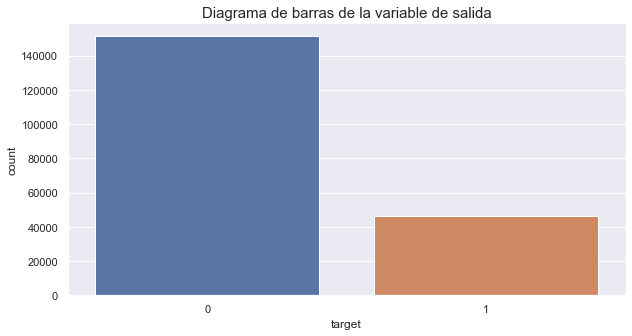

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'target' ,label= 'Count', data = data_prep)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

<AxesSubplot:>

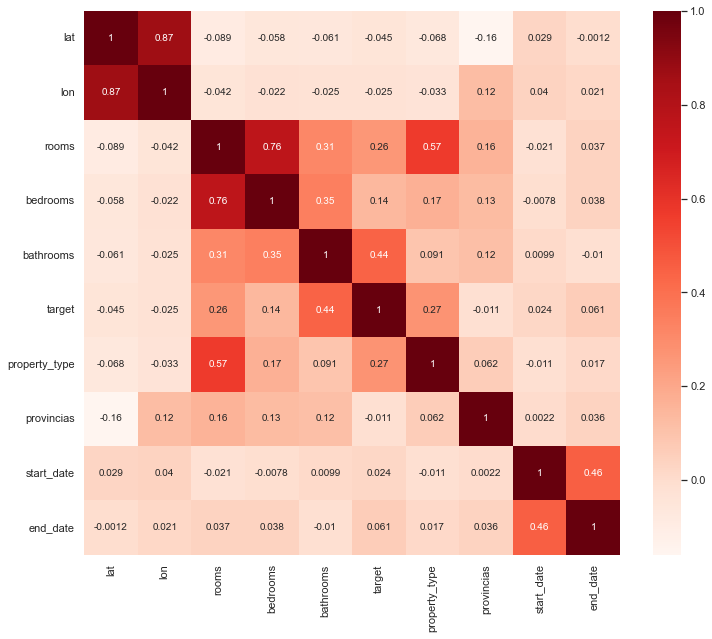

In [6]:
plt.figure(figsize=(12,10))
cor=data_prep.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

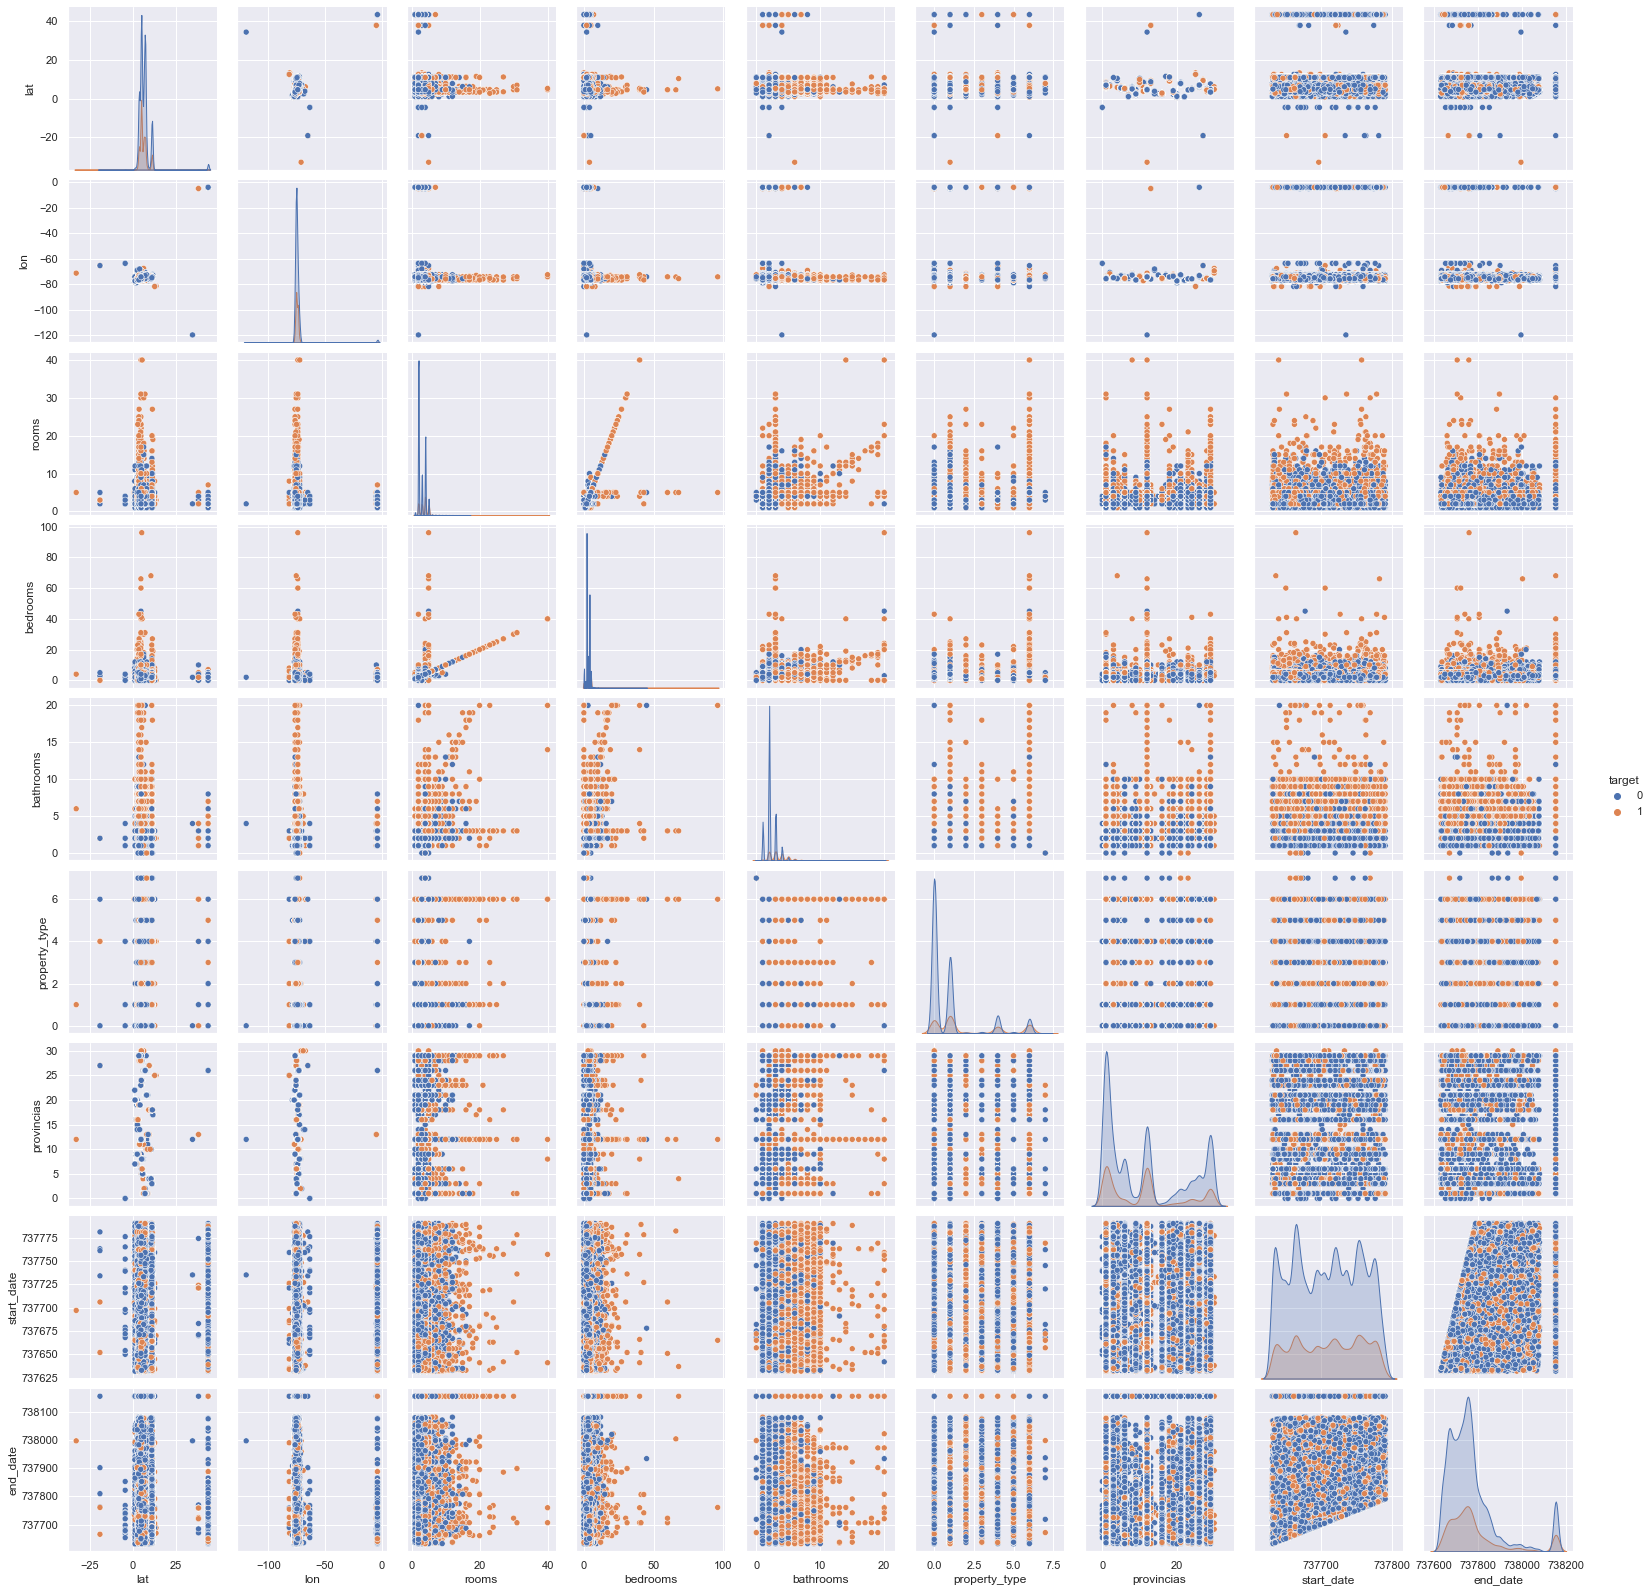

In [7]:
sns.pairplot(data_prep, hue = 'target')
plt.show()


In [8]:
data_prep.head()

,lat,lon,rooms,bedrooms,bathrooms,target,property_type,provincias,start_date,end_date
0,6.203000,-75.572000,4.0,4.0,4.0,1,1,1,737773,738155
1,4.722748,-74.073115,2.0,3.0,2.0,0,0,12,737684,737924
2,4.709000,-74.030000,4.0,4.0,2.0,0,1,12,737656,737657
3,43.462041,-3.809972,5.0,5.0,1.0,1,6,26,737752,737759
4,7.000008,-75.500009,2.0,2.0,2.0,0,0,1,737704,737705


Prueba con Vecinos mas Cercanos
---

---------

In [7]:
X = data_prep.iloc[:, [0,1,4,6]].values
Y = data_prep.iloc[:, 5].values

In [8]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

Instanciamos

In [24]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=3)

Predecimos

In [25]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = clf.predict(X_Train)

# Predecimos sobre nuestro set de testeo

y_test_pred = clf.predict(X_Test)

Metricas

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


print("accuracy:", accuracy_score(Y_Train,y_train_pred))

print("precision:", precision_score(Y_Train, y_train_pred, average='macro'))

print("recall:", recall_score(Y_Train, y_train_pred, average='macro'))

accuracy: 0.9143904266304897
precision: 0.8788777110861836
recall: 0.8861964829471114


In [27]:
print("accuracy:", accuracy_score(Y_Test,y_test_pred))

print("precision:", precision_score(Y_Test, y_test_pred, average='macro'))

print("recall:", recall_score(Y_Test, y_test_pred, average='macro'))

accuracy: 0.8767311897626954
precision: 0.8248069495546368
recall: 0.8316272659281847


In [28]:
from sklearn.metrics import classification_report

print(classification_report(Y_Test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     37999
           1       0.73      0.75      0.74     11389

    accuracy                           0.88     49388
   macro avg       0.82      0.83      0.83     49388
weighted avg       0.88      0.88      0.88     49388



In [29]:
from sklearn.metrics import recall_score

precision = recall_score(Y_Test, y_test_pred, average= None)
print(precision)

[0.91533988 0.74791465]


Prediccion del modelo para test
---

In [32]:
data_test = pd.read_csv('data_test.csv')

In [35]:
X = data_test.iloc[:, [0,1,4,6]].values
Y_apred = clf.predict(X)

In [36]:
resultado = pd.DataFrame({'pred': Y_apred})

In [37]:
resultado.to_csv("JavieraArrieta.csv", index=False)